## Plot EEG signal Topography

In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

from utils import eeg_utils as eeg

In [2]:
individual=9 #test=8,9
eeg_raw_instance = eeg.get_eeg_instance_01(individual, preprocessed=True)

../utils/eeg_utils.py:41: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True, verbose=0)


In [3]:
events = mne.events_from_annotations(eeg_raw_instance)[0]


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Scanner/Scan Start', 'Scanner/Scanner Start', 'Scanner/s ', 'SyncStatus/Sync On']


In [4]:
epochs = mne.Epochs(eeg_raw_instance, events, event_repeated='drop', preload=True)

Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
9915 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 9915 events and 176 original time points ...
2 bad epochs dropped


In [5]:
epochs

<Epochs  |   9913 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~852.1 MB, data loaded,
 '10001': 621
 '10002': 143
 '10004': 8817
 '99998': 332
 '99999': 0>

In [6]:
evoked = epochs.average().pick_types(eeg=True)

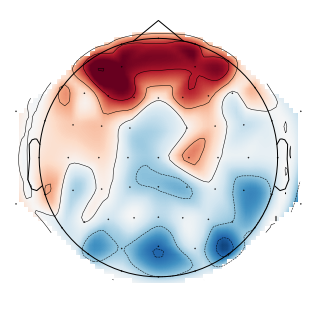

In [7]:
fig, axes = plt.subplots(figsize=(7.5, 4.5), nrows=1, ncols=1)


evoked.plot_topomap(0.0, ch_type="eeg", size=2, extrapolate="head",
                    axes=axes,
                    show=False, colorbar=False,
                    sphere=(0., 0., 0., 0.09))

axes.set_title("", fontsize=14)
fig.tight_layout()

plt.savefig('/home/david/eeg_to_fmri/results/best_qual/eeg_topo/topo_test_'+ str(individual-8) +'.pdf', format='pdf')